# imports

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

ds_jobs = pd.read_csv("data/customer_train.csv")

ds_jobs_transformed = ds_jobs.copy()


# Ejercicio 1:

In [96]:
ds_jobs_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [97]:
ds_jobs_transformed.head()
# Posibles columnas booleanas => gender, relevant_experience, enrolled_university, education_level, major_discipline, job_change, company_size, company_type

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [98]:
ds_jobs_transformed['job_change'].value_counts()
ds_jobs_transformed['relevant_experience'].value_counts()

# Columnas Booleanas => relevant_experience, job_change

relevant_experience
Has relevant experience    13792
No relevant experience      5366
Name: count, dtype: int64

In [99]:
map_experience = {
    'Has relevant experience': True,
    'No relevant experience': False
}
ds_jobs_transformed['relevant_experience'] = ds_jobs_transformed['relevant_experience'].map(map_experience)

In [100]:
ds_jobs_transformed['job_change'] = ds_jobs_transformed['job_change'].astype(bool)

In [101]:
ds_jobs_transformed[['relevant_experience','job_change']].head()

,relevant_experience,job_change
0,True,True
1,False,False
2,False,False
3,False,True
4,True,False


# Ejercicio 2:

In [102]:
ds_jobs_transformed.head()
# student_id,training_hours


,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.920,Male,True,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,True
1,29725,city_40,0.776,Male,False,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,False
2,11561,city_21,0.624,NaN,False,Full time course,Graduate,STEM,5,NaN,NaN,never,83,False
3,33241,city_115,0.789,NaN,False,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,True
4,666,city_162,0.767,Male,True,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,False


In [103]:
cols_int = ds_jobs_transformed.select_dtypes(include=np.integer).columns.tolist()
cols_int

['student_id', 'training_hours']

In [104]:
for col in cols_int:
    ds_jobs_transformed[col] =  ds_jobs_transformed[col].astype(np.int32)

In [105]:
ds_jobs_transformed[['student_id', 'training_hours']].dtypes

student_id        int32
training_hours    int32
dtype: object

# Ejercicio 3:

In [106]:
cols_float = ds_jobs_transformed.select_dtypes(include=[np.float64,np.float32]).columns.tolist()
cols_float

['city_development_index']

In [107]:
for col in cols_float:
    ds_jobs_transformed[col] =  ds_jobs_transformed[col].astype(np.float16)
ds_jobs_transformed['city_development_index'].dtype

dtype('float16')

# Ejercicio 4:

In [108]:
cols_cat = ds_jobs_transformed.select_dtypes(include=['object']).columns.tolist()
cols_cat

['city',
 'gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [109]:
for col in cols_cat:
    ds_jobs_transformed[col] = ds_jobs_transformed[col].astype('category')
ds_jobs_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              19158 non-null  int32   
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     19158 non-null  bool    
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int32   
 13  job_change              19158 non-null  bool    
dtypes: bool(2), category(9

# Ejercicio 5:


In [110]:
ordinal = {
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1'] + [str(i) for i in range(1, 21)] + ['>20'],
    'company_size': ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4'],
    'enrolled_university': ['no_enrollment', 'Part time course', 'Full time course']
}

In [111]:
for col,cat in ordinal.items():
    tipo_cat = CategoricalDtype(categories=cat,ordered=True)
    ds_jobs_transformed[col] = ds_jobs_transformed[col].astype(tipo_cat)
    
ds_jobs_transformed['company_size'].cat.categories

Index(['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999',
       '10000+'],
      dtype='object')

# Ejercicio 6:

In [112]:
ds_jobs_transformed['company_size'].value_counts()

company_size
50-99        3083
100-499      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [113]:
ds_jobs_transformed = ds_jobs_transformed[
    (ds_jobs_transformed['experience'] >= '10') &
    (ds_jobs_transformed['company_size'] > '500-999')
]
ds_jobs_transformed.shape


(2201, 14)

In [114]:
ds_jobs_transformed.to_csv('data/train.csv', index=False)

# Graficos


In [120]:
ds_jobs_transformed.columns

Index(['student_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

<Axes: >

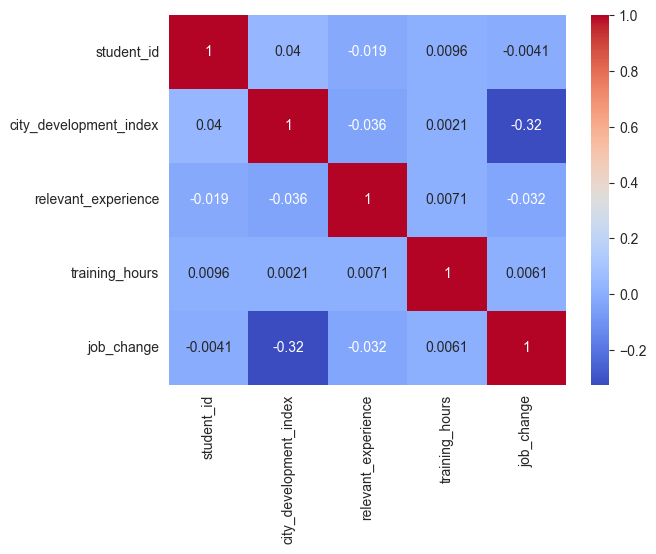

In [118]:
sns.heatmap(ds_jobs_transformed.corr(numeric_only=True), annot=True,cmap="coolwarm")

In [119]:
ds_jobs_transformed['city_development_index'].value_counts()

city_development_index
0.919922    877
0.910156    211
0.925781    167
0.624023    157
0.938965     92
           ... 
0.518066      1
0.722168      1
0.897949      1
0.795898      1
0.865234      1
Name: count, Length: 66, dtype: int64

<Axes: xlabel='job_change', ylabel='count'>

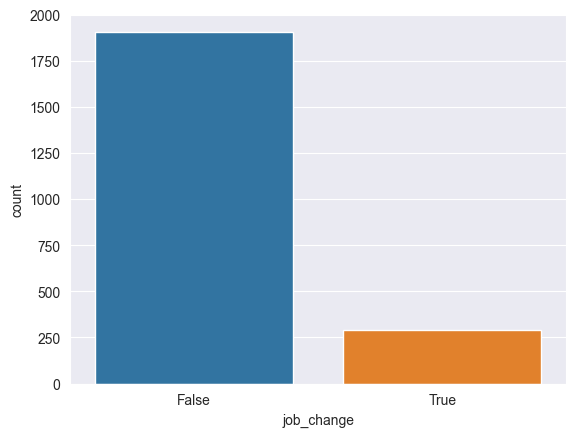

In [115]:
sns.set_style('darkgrid')
sns.countplot(data=ds_jobs_transformed, x='job_change', hue='job_change', legend=False)

Text(0.5, 1.0, 'Education Level')

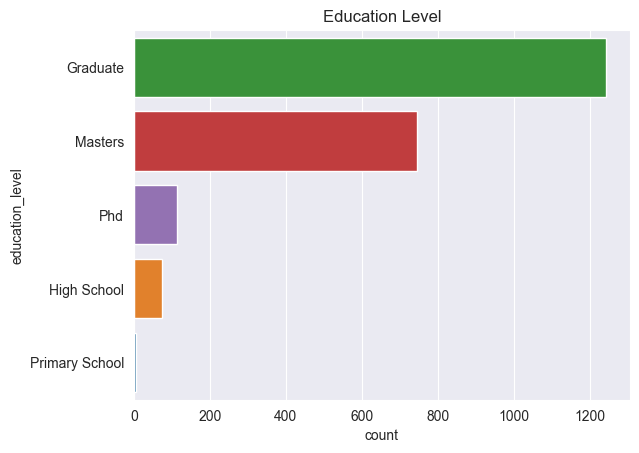

In [116]:
ax = sns.countplot(data=ds_jobs_transformed, y='education_level', hue='education_level', legend=False, order=ds_jobs_transformed['education_level'].value_counts().index)
ax.set_title("Education Level")

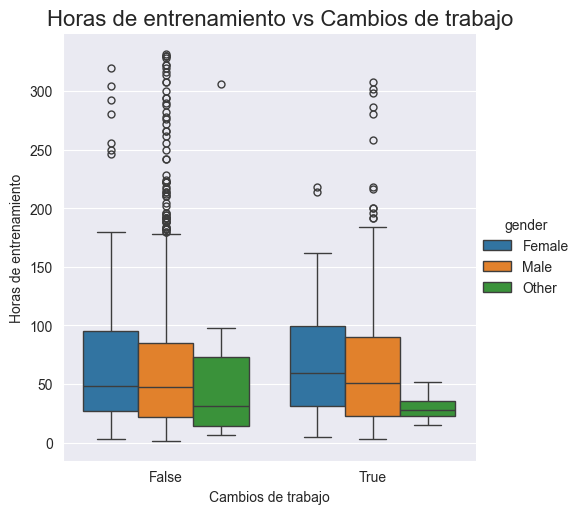

In [131]:
ax = sns.catplot(x='job_change', y='training_hours',hue='gender', data=ds_jobs_transformed, kind='box')
ax.fig.suptitle('Horas de entrenamiento vs Cambios de trabajo', size=16, y=1.02)
ax.set_ylabels('Horas de entrenamiento')
ax.set_xlabels('Cambios de trabajo')

Text(0, 0.5, 'Densidad')

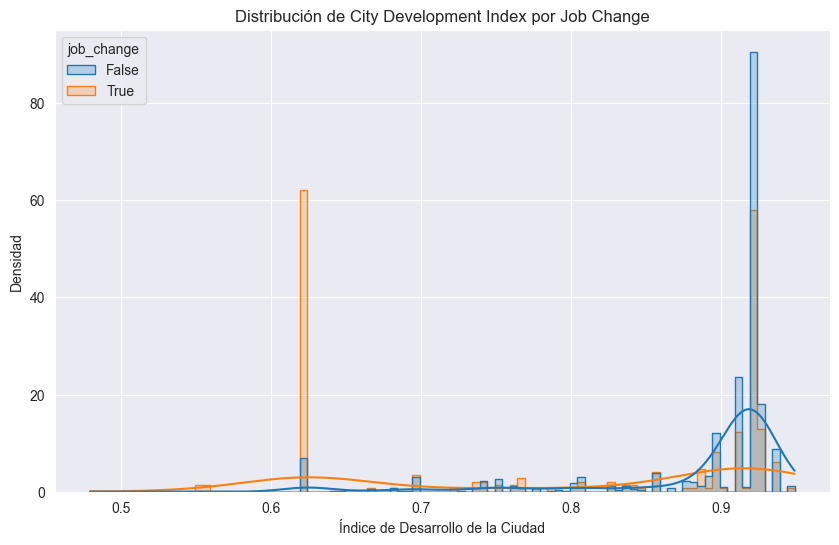

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=ds_jobs_transformed,
    x='city_development_index',
    hue='job_change',
    kde=True,
    stat='density',
    element='step',
    common_norm=False,

)
plt.title('Distribución de City Development Index por Job Change')
plt.xlabel('Índice de Desarrollo de la Ciudad')
plt.ylabel('Densidad')